# Amazon Review Classification

## Author: Ganesh N

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('processed_reviews_split_surnamesS_minimal.csv')
print(df.shape)

(32917, 5)


In [ ]:
df

,review_id,text,verified,review_score,product_category
0,product_review_000000,Works great!. A Decent Condenser Mic,False,5.0,musical_instruments
1,product_review_000001,All these other posts about DRM this and DRM t...,False,1.0,video_games
2,product_review_000002,Great looking strings on my black classical gu...,True,5.0,musical_instruments
3,product_review_000003,I know people rant and rave about this game li...,True,2.0,video_games
4,product_review_000004,these things are great! just takes some time t...,True,5.0,video_games
...,...,...,...,...,...
32912,product_review_032912,I work in a game store so I see a lot of games...,False,5.0,video_games
32913,product_review_032913,"Works well, but make sure the cord is not down...",True,5.0,musical_instruments
32914,product_review_032914,I had this years ago and I bought it for my da...,True,5.0,video_games
32915,product_review_032915,I've been playing through all the PS2 WWE game...,False,3.0,video_games


In [ ]:
df.isna().sum()

review_id             0
text                 13
verified            114
review_score          0
product_category    906
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32917 entries, 0 to 32916
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   review_id         32917 non-null  object 
 1   text              32904 non-null  object 
 2   verified          32803 non-null  object 
 3   review_score      32917 non-null  float64
 4   product_category  32011 non-null  object 
dtypes: float64(1), object(4)
memory usage: 1.3+ MB


### Exploratory Data Analysis

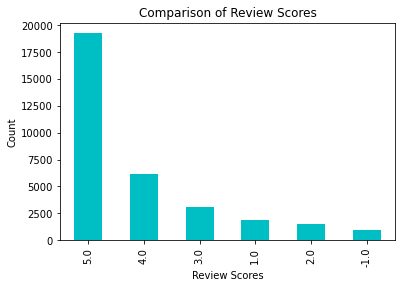

In [ ]:
df['review_score'].value_counts(normalize = True)
df['review_score'].value_counts(dropna = False).plot.bar(color = '#00bfc4')
plt.title('Comparison of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Count')
plt.show()

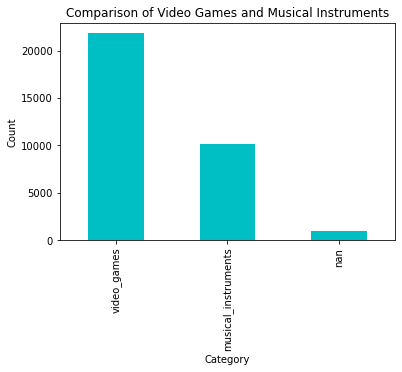

In [ ]:
df['product_category'].value_counts(normalize = True)
df['product_category'].value_counts(dropna = False).plot.bar(color = '#00bfc4')
plt.title('Comparison of Video Games and Musical Instruments')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

## 1. Product Category

### Data Cleaning

In [ ]:
product_category_df = pd.read_csv('amazon_review.csv', usecols = ['text','product_category'])
product_category_df.tail()

,text,product_category
32912,I work in a game store so I see a lot of games...,video_games
32913,"Works well, but make sure the cord is not down...",musical_instruments
32914,I had this years ago and I bought it for my da...,video_games
32915,I've been playing through all the PS2 WWE game...,video_games
32916,This for me is the best Zelda adventure yet. I...,video_games


In [ ]:
product_category_df = product_category_df.dropna() #drop null values
product_category_df = product_category_df.drop_duplicates(subset=['text']) # drop duplicates
product_category_df = product_category_df.reset_index(drop = True) # reset index

### Data Preprocessing

In [ ]:
product_category_df["product_category"] = np.where(product_category_df["product_category"] == "video_games", 1, 0) #
product_category_df

,text,product_category
0,Works great!. A Decent Condenser Mic,0
1,All these other posts about DRM this and DRM t...,1
2,Great looking strings on my black classical gu...,0
3,I know people rant and rave about this game li...,1
4,these things are great! just takes some time t...,1
...,...,...
30161,I work in a game store so I see a lot of games...,1
30162,"Works well, but make sure the cord is not down...",0
30163,I had this years ago and I bought it for my da...,1
30164,I've been playing through all the PS2 WWE game...,1


In [ ]:
product_category_df['product_category'].value_counts()

1    20601
0     9565
Name: product_category, dtype: int64

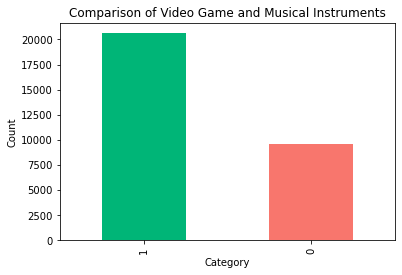

In [ ]:
product_category_df['product_category'].value_counts(normalize = True)
product_category_df['product_category'].value_counts(dropna = False).plot.bar(color = ['#00b577', '#f8766d'])
plt.title('Comparison of Video Game and Musical Instruments')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
product_category_df.shape

(30166, 2)

### Balancing Dataset

In [ ]:
#Balance Dataset
count_product_1, count_product_0= product_category_df.product_category.value_counts()
df_product_0 = product_category_df[product_category_df['product_category'] == 0]
df_product_1 = product_category_df[product_category_df['product_category'] == 1]
print("Musical Instruments", count_product_0)
print("Video Game", count_product_1)
df_product_0_over = df_product_0.sample(count_product_1, replace=True)
product_category_df = pd.concat([df_product_1, df_product_0_over], axis=0)

Musical Instruments 9565
Video Game 20601


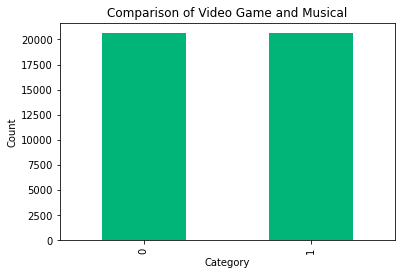

In [ ]:
product_category_df['product_category'].value_counts(normalize = True)
product_category_df['product_category'].value_counts(dropna = False).plot.bar(color = '#00b577')
plt.title('Comparison of Video Game and Musical')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

In [ ]:
product_category_df = product_category_df.reset_index(drop = True)
product_category_df

,text,product_category
0,All these other posts about DRM this and DRM t...,1
1,I know people rant and rave about this game li...,1
2,these things are great! just takes some time t...,1
3,This game brings be back to the original Gothi...,1
4,Awesome multiplayer and good single player gam...,1
...,...,...
41197,"This is an improved Snark, seems more rugged i...",0
41198,not very durable ... mine .. the sound no lon...,0
41199,It's a good ideal but the big problem I have i...,0
41200,"If you use fog, this is a super light for very...",0


In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganesh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
corpus = []

for i in range(0,len(product_category_df)):
    review = re.sub('[^a-zA-Z]',' ',product_category_df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[1:5]

['know peopl rant rave game like best thing sinc slice bread could not get concept sound cool visual cool fact dialogu made mumbl annoy fact alon made stop play meh',
 'thing great take time adjust way like trigger shoot thing great take time adjust',
 'game bring back origin gothic game world design care environ atmospher game great think like fli insect fog lightn earthquak thing make game fun play volcan island experi small tremor quak rock world dungeon caus dirt pebbl fall ceil voic act also good everi line far spoken dialogu think nice touch game challeng forc make choic chang happen start weakl must learn block attack opportun present wild hack slash friend put feet fight creatur test skill forc strateg realli like way lock enemi front danc around block wait perfect attack sometim perfect attack still get interrupt creatur surpris attack dodg realli make fight dynam fun level tackl creatur unless like eat dirt not go buy game demo chang mind real quick hope other buy game suppor

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1420)

In [ ]:
X = cv.fit_transform(corpus).toarray()
y= product_category_df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

### ML Models

#### a. GaussianNB Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("Confusion_matrix: \n\n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

Confusion_matrix: 

 [[4114   55]
 [1251 2821]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.99      0.86      4169
           1       0.98      0.69      0.81      4072

    accuracy                           0.84      8241
   macro avg       0.87      0.84      0.84      8241
weighted avg       0.87      0.84      0.84      8241



In [ ]:
print("video_games = 1 \nmusical_instruments = 0 \n")
print("Actual:     ",y_test[25:35])
print("Prediction: ",classifier.predict(X_test[25:35]))

video_games = 1 
musical_instruments = 0 

Actual:      [0 1 1 0 1 0 1 1 1 0]
Prediction:  [0 1 0 0 1 0 1 0 1 0]


#### b. MultinomialNB Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

confusion_matrix: 
 [[4016  153]
 [ 533 3539]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      4169
           1       0.96      0.87      0.91      4072

    accuracy                           0.92      8241
   macro avg       0.92      0.92      0.92      8241
weighted avg       0.92      0.92      0.92      8241



In [ ]:
print("video_games = 1 \nmusical_instruments = 0 \n")
print("Actual:     ",y_test[25:35])
print("Prediction: ",classifier.predict(X_test[25:35]))

video_games = 1 
musical_instruments = 0 

Actual:      [0 1 1 0 1 0 1 1 1 0]
Prediction:  [0 1 0 0 1 0 0 0 1 0]


#### c. LogisticRegression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\ganesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

confusion_matrix: 
 [[4053  116]
 [ 386 3686]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      4169
           1       0.97      0.91      0.94      4072

    accuracy                           0.94      8241
   macro avg       0.94      0.94      0.94      8241
weighted avg       0.94      0.94      0.94      8241



In [ ]:
print("video_games = 1 \nmusical_instruments = 0 \n")
print("Actual:     ",y_test[25:35])
print("Prediction: ",classifier.predict(X_test[25:35]))

video_games = 1 
musical_instruments = 0 

Actual:      [0 1 1 0 1 0 1 1 1 0]
Prediction:  [0 1 0 0 1 0 1 0 1 0]


#### d. KNeighborsClassifier Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

confusion_matrix: 
 [[3855  314]
 [ 696 3376]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.92      0.88      4169
           1       0.91      0.83      0.87      4072

    accuracy                           0.88      8241
   macro avg       0.88      0.88      0.88      8241
weighted avg       0.88      0.88      0.88      8241



In [ ]:
print("video_games = 1 \nmusical_instruments = 0 \n")
print("Actual:     ",y_test[25:35])
print("Prediction: ",classifier.predict(X_test[25:35]))

video_games = 1 
musical_instruments = 0 

Actual:      [0 1 1 0 1 0 1 1 1 0]
Prediction:  [0 1 0 0 1 0 1 0 1 0]


## 2. Review Score

In [ ]:
review_score_df = pd.read_csv('amazon_review.csv', usecols = ['text','review_score'])
review_score_df

,text,review_score
0,Works great!. A Decent Condenser Mic,5
1,All these other posts about DRM this and DRM t...,1
2,Great looking strings on my black classical gu...,5
3,I know people rant and rave about this game li...,2
4,these things are great! just takes some time t...,5
...,...,...
32912,I work in a game store so I see a lot of games...,5
32913,"Works well, but make sure the cord is not down...",5
32914,I had this years ago and I bought it for my da...,5
32915,I've been playing through all the PS2 WWE game...,3


### Data Cleaning

In [ ]:
review_score_df = review_score_df.dropna() #drop null values
review_score_df = review_score_df.drop_duplicates(subset=['text']) # drop duplicates
review_score_df.drop( review_score_df[ review_score_df['review_score'] == -1 ].index , inplace=True)
review_score_df = review_score_df.reset_index(drop = True) # reset index

### Data Preprocessing

In [ ]:
review_score_df['review_score'].value_counts()

5    17872
4     5751
3     2910
1     1730
2     1432
Name: review_score, dtype: int64

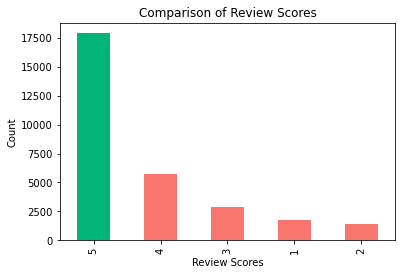

In [ ]:
review_score_df['review_score'].value_counts(normalize = True)
review_score_df['review_score'].value_counts(dropna = False).plot.bar(color = ['#00b577', '#f8766d', '#f8766d', '#f8766d', '#f8766d'])
plt.title('Comparison of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Count')
plt.show()

In [ ]:
review_score_df.shape

(29695, 2)

In [ ]:
review_score_df.review_score.value_counts()

5    17872
4     5751
3     2910
1     1730
2     1432
Name: review_score, dtype: int64

In [ ]:
count_review_5, count_review_4, count_review_3, count_review_1, count_review_2 = review_score_df.review_score.value_counts()
df_review_1 = review_score_df[review_score_df['review_score'] == 1]
df_review_2 = review_score_df[review_score_df['review_score'] == 2]
df_review_3 = review_score_df[review_score_df['review_score'] == 3]
df_review_4 = review_score_df[review_score_df['review_score'] == 4]
df_review_5 = review_score_df[review_score_df['review_score'] == 5]
print("count_review_5:", count_review_5)
print("count_review_4:", count_review_4)
print("count_review_3:", count_review_3)
print("count_review_1:", count_review_1)
print("count_review_2:", count_review_2)

count_review_5: 17872
count_review_4: 5751
count_review_3: 2910
count_review_1: 1730
count_review_2: 1432


### Balancing dataset

In [ ]:
df_review_1_over = df_review_1.sample(count_review_5, replace=True)
df_review_2_over = df_review_2.sample(count_review_5, replace=True)
df_review_3_over = df_review_3.sample(count_review_5, replace=True)
df_review_4_over = df_review_4.sample(count_review_5, replace=True)
review_score_df = pd.concat([df_review_5, df_review_4_over, df_review_3_over, df_review_2_over, df_review_1_over], axis=0)
review_score_df = review_score_df.reset_index(drop = True)
review_score_df

,text,review_score
0,Works great!. A Decent Condenser Mic,5
1,Great looking strings on my black classical gu...,5
2,these things are great! just takes some time t...,5
3,This game brings be back to the original Gothi...,5
4,Awesome multiplayer and good single player gam...,5
...,...,...
89355,"Im a big, big fan of horror and all the zombie...",1
89356,"This is not a new Harvest Moon game, it is a d...",1
89357,"First things first, I'm a big PS2 fanboy. I h...",1
89358,Used only about 4 times without any problems. ...,1


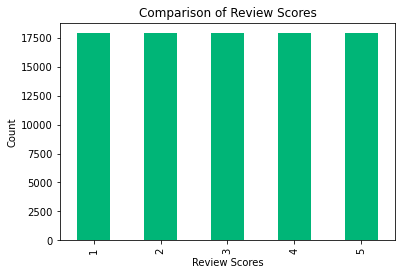

In [ ]:
review_score_df['review_score'].value_counts(normalize = True)
review_score_df['review_score'].value_counts(dropna = False).plot.bar(color = '#00b577')
plt.title('Comparison of Review Scores')
plt.xlabel('Review Scores')
plt.ylabel('Count')
plt.show()

In [ ]:
corpus = []

for i in range(0,len(review_score_df)):
    review = re.sub('[^a-zA-Z]',' ',review_score_df['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus[1:5]

['great look string black classic guitar need check tune funni need check daili mayb twice time worth troubl worth troubl',
 'thing great take time adjust way like trigger shoot thing great take time adjust',
 'game bring back origin gothic game world design care environ atmospher game great think like fli insect fog lightn earthquak thing make game fun play volcan island experi small tremor quak rock world dungeon caus dirt pebbl fall ceil voic act also good everi line far spoken dialogu think nice touch game challeng forc make choic chang happen start weakl must learn block attack opportun present wild hack slash friend put feet fight creatur test skill forc strateg realli like way lock enemi front danc around block wait perfect attack sometim perfect attack still get interrupt creatur surpris attack dodg realli make fight dynam fun level tackl creatur unless like eat dirt not go buy game demo chang mind real quick hope other buy game support game develop futur game like realli went 

In [ ]:
cv = CountVectorizer(max_features = 1420)

In [ ]:
X = cv.fit_transform(corpus).toarray()
y = review_score_df.iloc[:, -1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Models

#### a. GaussianNB Model

In [ ]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

confusion_matrix: 
 [[2028  267  210   51 1036]
 [ 997  839  284  131 1360]
 [ 620  231  742  264 1745]
 [ 298  133  321  620 2174]
 [ 163   51  167  271 2869]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.49      0.56      0.53      3592
           2       0.55      0.23      0.33      3611
           3       0.43      0.21      0.28      3602
           4       0.46      0.17      0.25      3546
           5       0.31      0.81      0.45      3521

    accuracy                           0.40     17872
   macro avg       0.45      0.40      0.37     17872
weighted avg       0.45      0.40      0.37     17872



In [ ]:
print("Actual:     ",y_test[25:35])
print("Prediction: ",classifier.predict(X_test[25:35]))

Actual:      [5 2 1 4 5 4 3 4 4 4]
Prediction:  [5 2 3 5 5 4 5 3 5 5]


#### b. MultinomialNB Model

In [ ]:
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

confusion_matrix: 
 [[2550  448  270   62  262]
 [ 917 1391  572  232  499]
 [ 502  444 1431  490  735]
 [ 255  199  575 1108 1409]
 [ 238   72  194  438 2579]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.57      0.71      0.63      3592
           2       0.54      0.39      0.45      3611
           3       0.47      0.40      0.43      3602
           4       0.48      0.31      0.38      3546
           5       0.47      0.73      0.57      3521

    accuracy                           0.51     17872
   macro avg       0.51      0.51      0.49     17872
weighted avg       0.51      0.51      0.49     17872



In [ ]:
print("Actual:     ",y_test[25:35])
print("Prediction: ",classifier.predict(X_test[25:35]))

Actual:      [5 2 1 4 5 4 3 4 4 4]
Prediction:  [5 1 4 5 5 4 3 5 4 1]


#### c. LogisticRegression Model

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

C:\Users\ganesh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

confusion_matrix: 
 [[2786  395  204   58  149]
 [ 506 2451  367  141  146]
 [ 297  405 2009  513  378]
 [ 154  216  529 1635 1012]
 [ 141  119  197  549 2515]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.72      0.78      0.75      3592
           2       0.68      0.68      0.68      3611
           3       0.61      0.56      0.58      3602
           4       0.56      0.46      0.51      3546
           5       0.60      0.71      0.65      3521

    accuracy                           0.64     17872
   macro avg       0.63      0.64      0.63     17872
weighted avg       0.63      0.64      0.63     17872



In [ ]:
print("Actual:     ",y_test[25:35])
print("Prediction: ",classifier.predict(X_test[25:35]))

Actual:      [5 2 1 4 5 4 3 4 4 4]
Prediction:  [5 2 1 5 5 4 3 4 4 1]


#### d. KNeighborsClassifier Model

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("confusion_matrix: \n", cm)

y_preds = classifier.predict(X_test)
y_preds = np.round(y_preds)
print("Classification Report: \n", classification_report(y_test, y_preds))

confusion_matrix: 
 [[3575    2    0   15    0]
 [  12 3578    7   14    0]
 [  19   20 3465   43   55]
 [  79   79  167 2812  409]
 [ 211  154  344  812 2000]]
Classification Report: 
               precision    recall  f1-score   support

           1       0.92      1.00      0.95      3592
           2       0.93      0.99      0.96      3611
           3       0.87      0.96      0.91      3602
           4       0.76      0.79      0.78      3546
           5       0.81      0.57      0.67      3521

    accuracy                           0.86     17872
   macro avg       0.86      0.86      0.85     17872
weighted avg       0.86      0.86      0.86     17872



In [ ]:
print("Actual:     ",y_test[25:35])
print("Prediction: ",classifier.predict(X_test[25:35]))

Actual:      [5 2 1 4 5 4 3 4 4 4]
Prediction:  [5 2 1 4 4 4 3 4 4 4]
